# Lista III de Descritiva #

Q2 - A planilha ”dadosmalariaCEA15P14.csv”contém dados de uma investigação sobre a incidência da malária durante a gravidez e os efeitos da infecção na mãe e no recém-nascido. O estudo foi realizado nos municı́pios de Cruzeiro do Sul, Mâncio Lima, Rodrigues Alves, Porto Walter e Marechal Thaumaturgo, no estado do Acre. Ao todo, 600 mulheres − não infectadas, infectadas com o parasita Plasmodium vivax, com o Plasmodium falciparum ou com ambos − fora acompanhadas durante a gestação e tiveram informações sobre o desfecho gestacional e sobre o recém-nascido registradas. Utilize os dados para responder às seguintes questões:

(a) Determine os diagramas de dispersão e os coeficientes de correlação
entre Perimetro Cefálico × Peso e Perimetro Cefálico × Estatura.

In [1]:
# Lendo o dataset

malaria <- read.csv('dadosmalariaCEA15P14.csv', sep = ';')

In [2]:
# Vamos dar uma olhada nas primeiras 3 linhas do dataframe
head(malaria, 3)

id,grupo,data,datnasc,idade,natural,bairro,cidade,profissa,estciv,⋯,max_paramal,trim_mal1,trim_mal2,trim_mal3,trim_mal4,trim_mal5,trimestres,trim_grupo,qtmal_grav,peso_plac_menor
1,3,05/12/2012,12/04/1993,19,CRUZEIRO DO SUL,SAO JOSE,CRUZEIRO DO SUL,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,1
2,1,07/12/2012,03/09/1994,18,GUAJARA,,GUAJARA,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,0
3,2,14/12/2012,18/05/1992,20,CRUZEIRO DO SUL,VILA SAO PEDRO,CRUZEIRO DO SUL,DO LAR,3,⋯,2,2,2,0,0,0,22000,2,2,0


In [5]:
# O coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$peso, malaria$pc)

ERROR: Error in cor(malaria$peso, malaria$pc): 'y' must be numeric


In [6]:
# O R interpretou a coluna pc como fator
is.factor(malaria$pc)

[1] TRUE

In [7]:
# Para usar a função unfactor()
# que desfaz a fatoração
library(varhandle)

In [8]:
pc <- unfactor(malaria$pc)

In [9]:
# vamos mudar para numérico
pc <- as.numeric(pc)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [10]:
library(zoo) # para usar a função na.aggregate() que substitui os valores nulos pela média da coluna pc
pc <- na.aggregate(pc)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [11]:
# O coeficiente de correlação entre Perimetro Cefálico e Peso
malaria$pc <- pc

In [12]:
malaria$peso <- na.aggregate(malaria$peso)

In [13]:
# Vamos tentar obter novamente o coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$peso, malaria$pc)

[1] 0.6579632

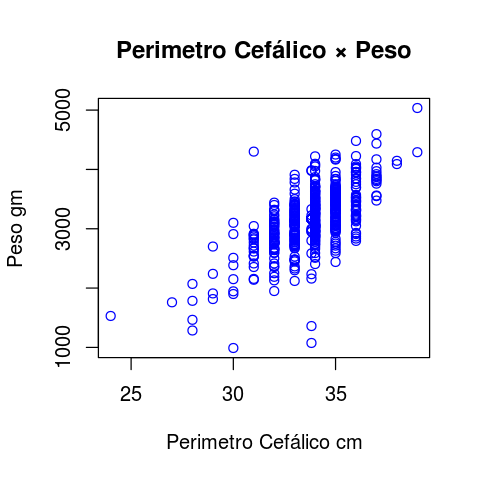

In [17]:
plot(malaria$pc, malaria$peso, 
        main = 'Perimetro Cefálico × Peso',
        xlab = 'Perimetro Cefálico cm', ylab = 'Peso gm',
        col = 'blue')

#abline(lm(malaria$pc ~ malaria$peso), col="red") # regression line (y~x)

In [18]:
# Vamos ver agora Cefálico × Estatura

cor(malaria$pc, malaria$est)

ERROR: Error in cor(malaria$pc, malaria$est): 'y' must be numeric


In [19]:
# Parece que estatura tbm saiu como fator
is.factor( malaria$est)

[1] TRUE

In [22]:
# Vamos mudar para númerico e substituir os valores nulos pela média da coluna
est <- unfactor(malaria$est)
est <- as.numeric(est)
est <- na.aggregate(est)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [24]:
malaria$est <- est

In [25]:
cor(malaria$pc, malaria$est)

[1] 0.5543555

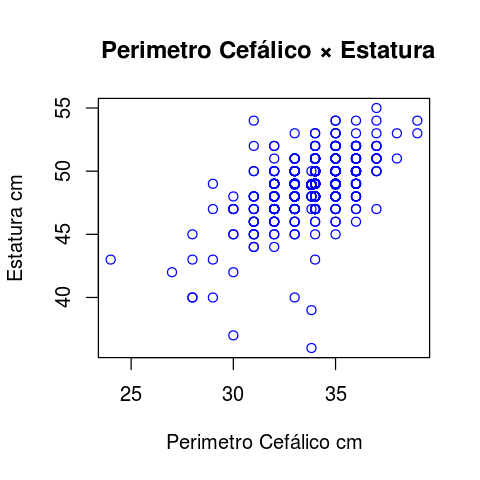

In [26]:
plot(malaria$pc, malaria$est, 
        main = ' Perimetro Cefálico × Estatura',
        xlab = 'Perimetro Cefálico cm', ylab = 'Estatura cm',
        col = 'blue')